#### Each blob class will come from a separate distribution of colour and shape

TODO:
- make 5 generations of blobs

In [26]:
# import math
from math import sqrt
%matplotlib inline
#%matplotlib qt #If this throws an error make sure you are in conda shell
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import skimage
import cv2

In [27]:
#ringey
#ellipsey
#spikey
#wavey
#bloby

class Blob:
    def __init__(self,name,size,ring,wave,noise,freq,hue,scale,elip=1):
        self.size  = 0.4 * size * scale
        self.ring  = 0.5 * ring * scale
        self.wave  = 0.5 * wave * scale
        self.noise = 0.5 * noise * scale
        self.freq  = freq
        self.hue   = hue
        self.name   = name
        self.elip   = elip


In [28]:
nrows = 200
ncols = nrows # only rectangle
x_c = nrows/2
y_c = ncols/2

blobclasses = []
blobclasses.append(Blob(name='wavey',
                        size = 0.8,
                        ring = -10, #that will eliminate ring
                        wave = 0.1,
                        noise = 0.2,
                        freq = 10,
                        hue = 0.0,
                        scale = nrows)
                  )
blobclasses.append(Blob(name='spikey',
                        size = 0.7,
                        ring = -10, #that will eliminate ring
                        wave = 0.5,
                        noise = 0.1,
                        freq = 20,
                        hue = 0.2,
                        scale = nrows)
                  )
blobclasses.append(Blob(name='misty',
                        size = 0.2,
                        ring = -10, #that will eliminate ring
                        wave = 0.1,
                        noise = 0.6,
                        freq = 2,
                        hue = 0.4,
                        scale = nrows)
                  )
blobclasses.append(Blob(name='bloby',
                        size = 0.9,
                        ring = -10, #that will eliminate ring
                        wave = 0.0,
                        noise = 0.1,
                        freq = 100,
                        hue = 0.6,
                        scale = nrows)
                  )
blobclasses.append(Blob(name='ellipsy',
                        size = 0.9,
                        ring = -10, #that will eliminate ring
                        wave = 0.0,
                        noise = 0.1,
                        freq = 100,
                        hue = 0.8,
                        scale = nrows,
                        elip = 3)
                  )
blobclasses.append(Blob(name='ringey',
                        size = 0.9,
                        ring = 0.3,
                        wave = 0.0,
                        noise = 0.1,
                        freq = 100,
                        hue = 1,
                        scale = nrows)
                   )
blobclasses.append(Blob(name='ringey-wavey-1',
                        size = 0.9,
                        ring = 0.2, #that will eliminate ring
                        wave = 0.2,
                        noise = 0.1,
                        freq = 10,
                        hue = 0.9,
                        scale = nrows,
                        elip = 1)
                  )
blobclasses.append(Blob(name='ringey-wavey-2',
                        size = 0.9,
                        ring = 0.2, #that will eliminate ring
                        wave = 0.2,
                        noise = 0.1,
                        freq = 15,
                        hue = 0.9,
                        scale = nrows,
                        elip = 1)
                  )
blobclasses.append(Blob(name='ringey-wavey-3',
                        size = 0.9,
                        ring = 0.2, #that will eliminate ring
                        wave = 0.2,
                        noise = 0.1,
                        freq = 20,
                        hue = 0.9,
                        scale = nrows,
                        elip = 1)
                  )
blobclasses.append(Blob(name='ringey-wavey-4',
                        size = 0.9,
                        ring = 0.2, #that will eliminate ring
                        wave = 0.2,
                        noise = 0.1,
                        freq = 13,
                        hue = 0.9,
                        scale = nrows,
                        elip = 1)
                  )
blobclasses.append(Blob(name='ringey-wavey-5',
                        size = 0.9,
                        ring = 0.2, #that will eliminate ring
                        wave = 0.2,
                        noise = 0.1,
                        freq = 18,
                        hue = 0.9,
                        scale = nrows,
                        elip = 1)
                  )
blobclasses.append(Blob(name='ringey-wavey-6',
                        size = 0.9,
                        ring = 0.2, #that will eliminate ring
                        wave = 0.2,
                        noise = 0.1,
                        freq = 25,
                        hue = 0.9,
                        scale = nrows,
                        elip = 1)
                  )

In [29]:
def myblobsCircle(x,y,xc,yc):
    if sqrt(pow(abs(x-xc),2)+pow(abs(y-yc),2))<np.random.normal(30,10):
        return 1
    else:
        return 0
    
def randomisehue(hue):
    rgbval = colorsys.hsv_to_rgb(hue, 0.7, 0.7)
    return [int(rgbval[0]*255),int(rgbval[1]*255),int(rgbval[2]*255)]

def myblobs(x,y,xc,yc,mag_blob,mag_wave,frequency,mag_noise,mag_ring,hue):
    c_angle = 2+np.arctan2(x-xc,y-yc)
    dist_from_centre = pow(abs(x-xc),2)+pow(abs(y-yc),2)
    noise_size=np.random.normal(0,mag_noise)
    if sqrt(dist_from_centre)<(mag_blob-mag_wave + mag_wave*np.sin(frequency*c_angle)+noise_size ):
        if sqrt(dist_from_centre)>(mag_ring+noise_size ):
            return randomisehue(hue)
        else:
            return 0
    else:
        return 0
    
def myblobsB(x,y,xc,yc,mag_blob,mag_wave,frequency,mag_noise,hue):
    c_angle = np.arctan2(x-xc,y-yc)
    if sqrt(pow(abs(x-xc),2)+pow(abs(y-yc),2))<(mag_blob+mag_wave*np.round(np.sin(frequency*c_angle))+ np.random.normal(0,mag_noise)):
        return randomisehue(hue)
    else:
        return 0
      
def blobOutlineAsSignal(l):
    return np.sin(np.arange(2*math.pi * l))

def afineblob(stretch,angle,translate_vec,blob):
        #stretch horizontal
        sx=1
        sy=1/stretch
        r_angle = angle
        
        off_centre_translate=np.array([[1,0,translate_vec[0]],[0,1,translate_vec[1]],[0,0,1]]).astype('float')
        tx = x_c - x_c * sx
        ty = y_c - y_c * sy
        stretch=np.array([[sx,0,0],[0,sy,0],[0,0,1]]).astype('float')
        translate=np.array([[1,0,tx],[0,1,ty],[0,0,1]]).astype('float')
        #translate to x_c, y_c and translate back
        trans_c=np.array([[1,0,sx*x_c],[0,1,sy*y_c],[0,0,1]]).astype('float')
        trans_c_back=np.array([[1,0,-sx*x_c],[0,1,-sy*y_c],[0,0,1]]).astype('float')
        #Rotate around origin
        rotate=np.array([[np.cos(r_angle),-np.sin(r_angle),0],[np.sin(r_angle),np.cos(r_angle),0],[0,0,1]]).astype('float')
        #shear
        M= (off_centre_translate @ (translate @ (trans_c @ rotate @ trans_c_back) @ stretch))[0:2,:]
        
        blob = blob.astype('uint8') 
        #blob = cv2.warpAffine(blob,trans_c_back[0:2,:],(ncols,nrows)) 
        blob = cv2.warpAffine(blob,M,(ncols,nrows)) 
        return blob

In [30]:
import os
print(os.getcwd())
os.chdir('/home/mix/repos/emelblobs')
print(os.getcwd())

/home/mix/repos/emelblobs
/home/mix/repos/emelblobs


In [ ]:
howmany=150
#for blobproto in blobclasses[0:1]:
#for blobproto in blobclasses[len(blobclasses)-6:len(blobclasses)]:
for blobproto in blobclasses:
    fig, axes = plt.subplots(1, howmany,figsize=(10,howmany*10))
    for iii in range(howmany):
        mag_wave=np.random.normal(blobproto.wave,3)
        mag_ring=np.random.normal(blobproto.ring,1)
        mag_blob=np.random.normal(blobproto.size,3)
        mag_noise=np.random.normal(blobproto.noise,1)
        mag_elip=blobproto.elip
        frequency=np.random.normal(blobproto.freq,2)
        hue=blobproto.hue
        #hue=np.random.uniform(1,11)
        blob = np.zeros([nrows,ncols,3],int)
        blob_hue=np.random.normal(hue,0.03)
        for x in range(nrows):
            for y in range(ncols):
                # and make a colour pattern
                localhue=np.random.normal(blob_hue,0.2)
                blob[x,y,:] = myblobs(x,y,x_c,y_c,mag_blob,mag_wave,frequency,mag_noise,mag_ring,localhue)
        #blob = afineblob(mag_elip,np.pi/np.random.uniform(0,12),(0,0),blob)
        blob = afineblob(mag_elip,np.pi/np.random.uniform(0,12),(np.random.normal(0,30),np.random.normal(0,30)),blob)
        blob_filtered_colour = cv2.blur(blob, (5,5))
        print('blobput_diff/'+blobproto.name + '_' + str(iii) + '.png')
        cv2.imwrite('blobput_diff/'+blobproto.name + '_' + str(iii) + '.png',blob_filtered_colour)
#        axes[iii].imshow(blob_filtered_colour)
#        axes[iii].set_title(blobproto.name)
#    
#plt.show()

#plt.savefig('foo.png')

blobput_diff/wavey_0.png
blobput_diff/wavey_1.png
blobput_diff/wavey_2.png
blobput_diff/wavey_3.png
blobput_diff/wavey_4.png
blobput_diff/wavey_5.png
blobput_diff/wavey_6.png
blobput_diff/wavey_7.png
blobput_diff/wavey_8.png
blobput_diff/wavey_9.png
blobput_diff/wavey_10.png
blobput_diff/wavey_11.png
blobput_diff/wavey_12.png
blobput_diff/wavey_13.png
blobput_diff/wavey_14.png
blobput_diff/wavey_15.png
blobput_diff/wavey_16.png
blobput_diff/wavey_17.png
blobput_diff/wavey_18.png
blobput_diff/wavey_19.png
blobput_diff/wavey_20.png
blobput_diff/wavey_21.png
blobput_diff/wavey_22.png
blobput_diff/wavey_23.png
blobput_diff/wavey_24.png
blobput_diff/wavey_25.png
blobput_diff/wavey_26.png
blobput_diff/wavey_27.png
blobput_diff/wavey_28.png
blobput_diff/wavey_29.png
blobput_diff/wavey_30.png
blobput_diff/wavey_31.png
blobput_diff/wavey_32.png
blobput_diff/wavey_33.png
blobput_diff/wavey_34.png
blobput_diff/wavey_35.png
blobput_diff/wavey_36.png
blobput_diff/wavey_37.png
blobput_diff/wavey_38.

In [ ]:
#for blobproto in blobclasses[0:1]:image = np.full([nrows,ncols,3],randomisehue(3),int)
row,col,ch= image.shape
gauss = np.random.normal(30,4,(row,col,ch))

In [88]:
M

array([[   1.8,    0.6, -110. ],
       [   0.8,    1.6, -110. ]])

In [31]:
print(hue)

31.5242840631377


In [69]:
np.random.uniform(0,2*np.pi)

4.957075722929064

In [20]:
from PIL import Image
from IPython.display import display # to display images

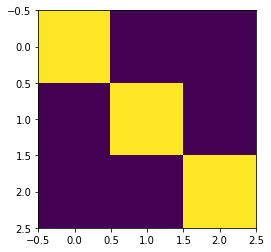

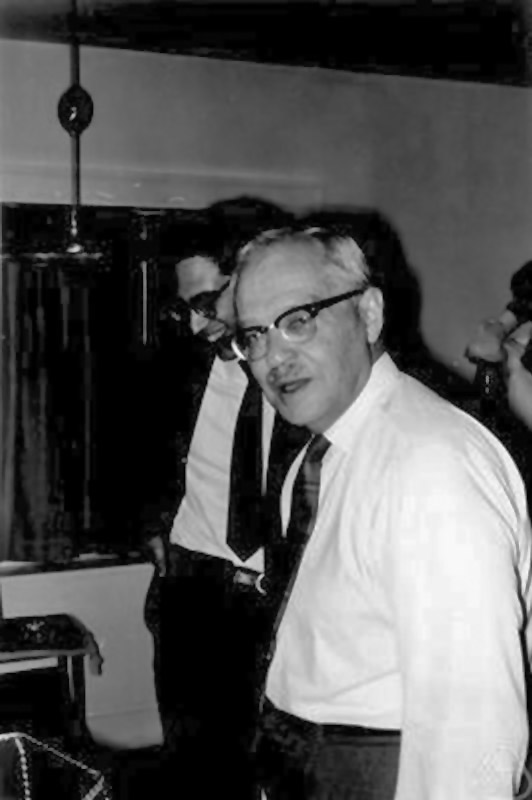

In [23]:
img = Image.open('neyman.jpg')
display(img)